# SU2020 overview

- SU2020a: trkqual > 0.8, t0err
- SU2020b: trkqual > 0.2, t0err
- SU2020c: No trkqual, t0err
- SU2020d: No trkqual, no t0err
- SU2020e: trkqual > 0.2, no t0err

## Preamble

In [73]:
# External packages
import sys
import warnings
warnings.filterwarnings("ignore") # suppress warnings
import matplotlib.pyplot as plt
import awkward as ak
import numpy as np

# pyutils classes
from pyutils.pylogger import Logger
from pyutils.pyplot import Plot
from pyutils.pyselect import Select

# mu2e-cosmic classes
sys.path.extend(["../../src/utils", "../../src/core"])
from io_manager import Load
from analyse import Analyse # just for pitch angle

logger = Logger(print_prefix="[SU2020 overview]")

## Load data

In [37]:
ana_labels = {
    "SU2020a" : [
        "SU2020a_CRY_onspill-LH_au", 
        "SU2020a_CRY_onspill-LH_aw",
        "SU2020a_CRY_offspill-LH_as",
        "SU2020a_signal_onspill-LH_au",
        "SU2020a_signal_onspill-LH_aw"
    ],
    "SU2020b" : [
        "SU2020b_CRY_onspill-LH_au", 
        "SU2020b_CRY_onspill-LH_aw",
        "SU2020b_CRY_offspill-LH_as",
        "SU2020b_signal_onspill-LH_au",
        "SU2020b_signal_onspill-LH_aw"
    ],
    "SU2020c" : [
        "SU2020c_CRY_onspill-LH_au", 
        "SU2020c_CRY_onspill-LH_aw",
        "SU2020c_CRY_offspill-LH_as",
        "SU2020c_signal_onspill-LH_au",
        "SU2020c_signal_onspill-LH_aw"
    ],
    "SU2020d" : [
        "SU2020d_CRY_onspill-LH_au", 
        "SU2020d_CRY_onspill-LH_aw",
        "SU2020d_CRY_offspill-LH_as",
        "SU2020d_signal_onspill-LH_au",
        "SU2020d_signal_onspill-LH_aw"
    ]
}

In [38]:
def load(ana_labels):
    results = {}
    for key, ana_labels_list in ana_labels.items():  
        results[key] = {}  
        for ana_label in ana_labels_list:
            loader = Load(
                in_path=f"../../output/results/{ana_label}"
            )
            results[key][ana_label] = loader.load_pkl() 
    return results

results = load(ana_labels)

[Load] ✅ Initialised with out_path=../../output/results/SU2020a_CRY_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_CRY_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_CRY_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_CRY_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_CRY_offspill-LH_as
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_CRY_offspill-LH_as/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_signal_onspill-LH_au
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_signal_onspill-LH_au/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020a_signal_onspill-LH_aw
[Load] ✅ Successfully loaded results from ../../output/results/SU2020a_signal_onspill-LH_aw/results.pkl
[Load] ✅ Initialised with out_path=../../output/results/SU2020b_CRY_ons

In [41]:
print(results.keys())
print(results["SU2020a"].keys())

dict_keys(['SU2020a', 'SU2020b', 'SU2020c', 'SU2020d'])
dict_keys(['SU2020a_CRY_onspill-LH_au', 'SU2020a_CRY_onspill-LH_aw', 'SU2020a_CRY_offspill-LH_as', 'SU2020a_signal_onspill-LH_au', 'SU2020a_signal_onspill-LH_aw'])


## Compare efficiency

We want to maximise signal efficiency in signal datasets and maximise veto efficiency in cosmic datasets

In [42]:
def get_eff(results):
    """
    Extract efficiency data from the nested results dictionary.
    Returns nested dictionaries with the same structure as results.
    """
    sig_eff_dict, veto_eff_dict = {}, {}
    # eff_dict = {}
    
    # Iterate through top-level keys (e.g., "SU2020c", "SU2020d")
    for key in results.keys():

        # eff_dict[key] = {}
        sig_eff_dict[key] = {}
        veto_eff_dict[key] = {}
        
        # Iterate through analysis labels for this key
        for ana_label in results[key].keys():
            
            analysis = results[key][ana_label]["analysis"]

            print(50*"=")

            # display(analysis)
            try:
        
                if "signal" in ana_label:
                    print(f"Processing signal: {ana_label}")
                    
                    sig_eff          = float(analysis.at[2, "CE-like (wide)"])
                    sig_eff_err_low  = abs(float(analysis.at[3, "CE-like (wide)"]))
                    sig_eff_err_hi   = float(analysis.at[4, "CE-like (wide)"])
                    sig_eff_err      = np.array([sig_eff_err_low, sig_eff_err_hi])
                    
                    sig_eff_dict[key][ana_label] = {
                        "sig_eff": sig_eff,
                        "sig_eff_err": sig_eff_err
                    }
                    
                elif "CRY" in ana_label:     
                    print(f"Processing CRY: {ana_label}")
                    veto_eff         = float(analysis.at[2, "No veto (wide)"])
                    veto_eff_err_low = abs(float(analysis.at[3, "No veto (wide)"]))
                    veto_eff_err_hi  = float(analysis.at[4, "No veto (wide)"])
                    veto_eff_err     = np.array([veto_eff_err_low, veto_eff_err_hi])
            
                    veto_eff_dict[key][ana_label] = {
                        "veto_eff": veto_eff,
                        "veto_eff_err": veto_eff_err
                    }

                logger.log("Success", "success")
                    
            except Exception as e:
                logger.log("Failed", "error")
                  
            print(50*"=")
    
    return sig_eff_dict, veto_eff_dict

sig_eff_dict, veto_eff_dict = get_eff(results)

Processing CRY: SU2020a_CRY_onspill-LH_au
[pylogger] ✅ Success
Processing CRY: SU2020a_CRY_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: SU2020a_CRY_offspill-LH_as
[pylogger] ✅ Success
Processing signal: SU2020a_signal_onspill-LH_au
[pylogger] ✅ Success
Processing signal: SU2020a_signal_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: SU2020b_CRY_onspill-LH_au
[pylogger] ✅ Success
Processing CRY: SU2020b_CRY_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: SU2020b_CRY_offspill-LH_as
[pylogger] ✅ Success
Processing signal: SU2020b_signal_onspill-LH_au
[pylogger] ✅ Success
Processing signal: SU2020b_signal_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: SU2020c_CRY_onspill-LH_au
[pylogger] ✅ Success
Processing CRY: SU2020c_CRY_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: SU2020c_CRY_offspill-LH_as
[pylogger] ✅ Success
Processing signal: SU2020c_signal_onspill-LH_au
[pylogger] ✅ Success
Processing signal: SU2020c_signal_onspill-LH_aw
[pylogger] ✅ Success
Processing CRY: 

[pyplot] ⭐️ Initialised Plot with mu2e.mplstyle and verbosity = 1
Wrote ../../output/images/comp/bo_eff_comp_all_cutsets.png


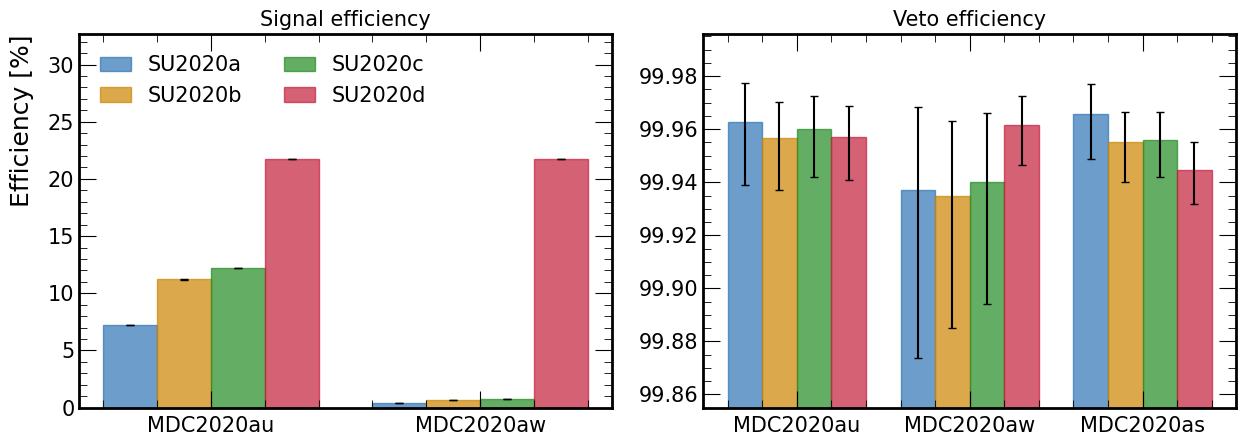

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from pyutils.pyplot import Plot
plotter = Plot() # literally just do this for the style file, super laxy

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6.4*2, 4.8))

# Signal efficiency - plot all cutsets (a, b, c, d)
sig_labels = ["MDC2020au", "MDC2020aw"]  # Only au and aw have signal data
cutsets = ["SU2020a", "SU2020b", "SU2020c", "SU2020d"]
colors = ["#2E74B5", "#CC8400", "#228B22", "#C41E3A"]  # Different colors for each cutset

x = np.arange(len(sig_labels))
width = 0.2  # Narrower bars to fit 4 cutsets

for i, cutset in enumerate(cutsets):
    sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
    sig_errs = np.array([[data["sig_eff_err"][0] for data in sig_eff_dict[cutset].values()],
                        [data["sig_eff_err"][1] for data in sig_eff_dict[cutset].values()]])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax1.bar(x + offset, sig_effs, width, yerr=sig_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # #, 
            # label=cutset.replace("SU2020", ""))

ax1.set_xticks(x)
ax1.set_xticklabels(sig_labels)
ax1.set_ylabel("Efficiency [%]")
ax1.set_title("Signal efficiency")
ax1.legend(ncols=2, loc="upper left")
ax1.set_ylim(0, max([max([data["sig_eff"] for data in sig_eff_dict[cutset].values()]) 
                    for cutset in cutsets]) * 1.5)

# Veto efficiency - plot all cutsets (a, b, c, d)
veto_labels = ["MDC2020au", "MDC2020aw", "MDC2020as"]  # All three have veto data

x = np.arange(len(veto_labels))
width = 0.2  # Narrower bars to fit 4 cutsets

for i, cutset in enumerate(cutsets):
    veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
    veto_errs = np.array([[data["veto_eff_err"][0] for data in veto_eff_dict[cutset].values()],
                         [data["veto_eff_err"][1] for data in veto_eff_dict[cutset].values()]])
    
    offset = (i - 1.5) * width  # Center the 4 bars around each x position
    ax2.bar(x + offset, veto_effs, width, yerr=veto_errs, capsize=3, 
            color=colors[i], alpha=0.7, edgecolor=colors[i], label=cutset) # .replace("SU2020", ""))

ax2.set_xticks(x)
ax2.set_xticklabels(veto_labels)
# ax2.set_ylabel("Efficiency [%]")
ax2.set_title("Veto efficiency")
# ax2.legend()

# Set y-axis limits for veto efficiency (they"re typically very high, around 99.9%)
veto_min = min([min([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
               for cutset in cutsets])
veto_max = max([max([data["veto_eff"] for data in veto_eff_dict[cutset].values()]) 
               for cutset in cutsets])
ax2.set_ylim(veto_min * 0.9992, veto_max * 1.0003)

plt.tight_layout()
out_path = "../../output/images/comp/bo_eff_comp_all_cutsets.png"
plt.savefig(out_path, dpi=300)
print(f"Wrote {out_path}")
plt.show()

In [105]:
def get_optimal_cutset(sig_eff_dict, veto_eff_dict, veto_threshold=99.9, include_errors=True, out_path = None):
    """
    Find the cutset that maximises signal efficiency while maintaining veto efficiency above threshold
    
    Args:
        veto_threshold: minimum acceptable veto efficiency (default 99.9%)
        include_errors: if True, check if veto_eff - error > threshold
    """

    report_str = "=== ANALYSIS ===\n"

    logger.log(f"Maximising signal efficiency with veto efficiency >= {veto_threshold}%\n", "info")
    
    valid_cutsets = {}
    invalid_cutsets = {}
    
    for cutset in ["SU2020a", "SU2020b", "SU2020c", "SU2020d"]:

        report_str += f"\n--- {cutset} ---\n"
        
        # Signal efficiency stats
        sig_effs = [data["sig_eff"] for data in sig_eff_dict[cutset].values()]
        avg_sig_eff = np.mean(sig_effs)
        sig_std = np.std(sig_effs)
        
        # Veto efficiency stats  
        veto_effs = [data["veto_eff"] for data in veto_eff_dict[cutset].values()]
        avg_veto_eff = np.mean(veto_effs)
        veto_std = np.std(veto_effs)
        
        # Check if veto efficiency meets threshold
        if include_errors:
            # Fairly loose: require veto_eff + 1sigma error > threshold
            min_veto_errors = [data["veto_eff"] - data["veto_eff_err"][0] 
                              for data in veto_eff_dict[cutset].values()]
            min_veto_with_error = min(min_veto_errors)
            veto_passes = min_veto_with_error > veto_threshold
            check_value = min_veto_with_error
        else:
            # Just check average
            veto_passes = avg_veto_eff > veto_threshold  
            check_value = avg_veto_eff
        
        status = "GOOD" if veto_passes else "WARNING"

        report_str += f"Status: {status}\n"
        report_str += f"  Signal efficiency: {avg_sig_eff:.3f}% ± {sig_std:.3f}\n"
        report_str += f"  Veto efficiency:   {avg_veto_eff:.5f}% ± {veto_std:.5f}\n"
        report_str += f"  Veto check value:  {check_value:.5f}% (threshold: {veto_threshold}%)\n"
        
        cutset_data = {
            "avg_sig_eff": avg_sig_eff,
            "sig_std": sig_std,
            "avg_veto_eff": avg_veto_eff,
            "veto_std": veto_std,
            "veto_check_value": check_value,
            "veto_passes": veto_passes
        }
        
        if veto_passes:
            valid_cutsets[cutset] = cutset_data
        else:
            invalid_cutsets[cutset] = cutset_data
    
    report_str += "\n=== RESULTS ===\n\n"
    
    if not valid_cutsets:
        report_str += "No cutsets meet the veto efficiency threshold!\n"
        # Show best veto performer as fallback
        best_veto = max(invalid_cutsets.items(), key=lambda x: x[1]["avg_veto_eff"])
        report_str += f"Best veto performance: {best_veto[0]} ({best_veto[1]["avg_veto_eff"]:.5f}%)\n"
        return report_str
    
    # Find best signal efficiency among valid cutsets
    best_cutset = max(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"])
    
    # Show ranking of valid cutsets
    ranked_valid = sorted(valid_cutsets.items(), key=lambda x: x[1]["avg_sig_eff"], reverse=True)
    for i, (cutset, data) in enumerate(ranked_valid, 1):
        margin = data["veto_check_value"] - veto_threshold
        report_str += f"{i}. {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto +{margin:.5f}% margin\n"

    report_str += f"\nOPTIMAL CUTSET: {best_cutset[0]}:\n\n"
    report_str += f"   Signal efficiency: {best_cutset[1]["avg_sig_eff"]:.3f}% ± {best_cutset[1]["sig_std"]:.3f}\n"
    report_str += f"   Veto efficiency:   {best_cutset[1]["avg_veto_eff"]:.5f}% ± {best_cutset[1]["veto_std"]:.5f}\n"
    report_str += f"   Veto margin above threshold: +{best_cutset[1]["veto_check_value"] - veto_threshold:.5f}%\n"

    
    if invalid_cutsets:
        report_str += f"\n=== CUTSETS BELOW VETO THRESHOLD ===\n"
        for cutset, data in invalid_cutsets.items():
            deficit = veto_threshold - data["veto_check_value"]
            report_str += f"   {cutset}: Signal {data["avg_sig_eff"]:.3f}%; Veto -{deficit:.5f}% below threshold\n"

    print(report_str)
    
    if out_path is not None:
        with open(out_path, "w") as f:
            f.write(report_str)
        logger.log(f"Wrote {out_path}", "success")

get_optimal_cutset(sig_eff_dict, veto_eff_dict, out_path="../../output/misc/optimal_cutset_SU2020.txt")

[SU2020 overview] ⭐️ Maximising signal efficiency with veto efficiency >= 99.9%

=== ANALYSIS ===

--- SU2020a ---
Status: WARNING
  Signal efficiency: 3.819% ± 3.414
  Veto efficiency:   99.95519% ± 0.01298
  Veto check value:  99.87387% (threshold: 99.9%)

--- SU2020b ---
Status: WARNING
  Signal efficiency: 5.940% ± 5.267
  Veto efficiency:   99.94894% ± 0.00989
  Veto check value:  99.88511% (threshold: 99.9%)

--- SU2020c ---
Status: WARNING
  Signal efficiency: 6.466% ± 5.723
  Veto efficiency:   99.95203% ± 0.00868
  Veto check value:  99.89393% (threshold: 99.9%)

--- SU2020d ---
Status: GOOD
  Signal efficiency: 21.749% ± 0.010
  Veto efficiency:   99.95444% ± 0.00711
  Veto check value:  99.93167% (threshold: 99.9%)

=== RESULTS ===

1. SU2020d: Signal 21.749%; Veto +0.03167% margin

OPTIMAL CUTSET: SU2020d:

   Signal efficiency: 21.749% ± 0.010
   Veto efficiency:   99.95444% ± 0.00711
   Veto margin above threshold: +0.03167%

=== CUTSETS BELOW VETO THRESHOLD ===
   SU2020